In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('Diabetes.csv')

In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [74]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   AgeGroup                  767 non-null    category
 10  AgeGroupDecade            767 non-null    category
 11  cuartiles                 768 non-null    category
 12  grupos                    767 non-null    category
dtypes: category(4), float64(2), int64(7)
memory usage:

### A)

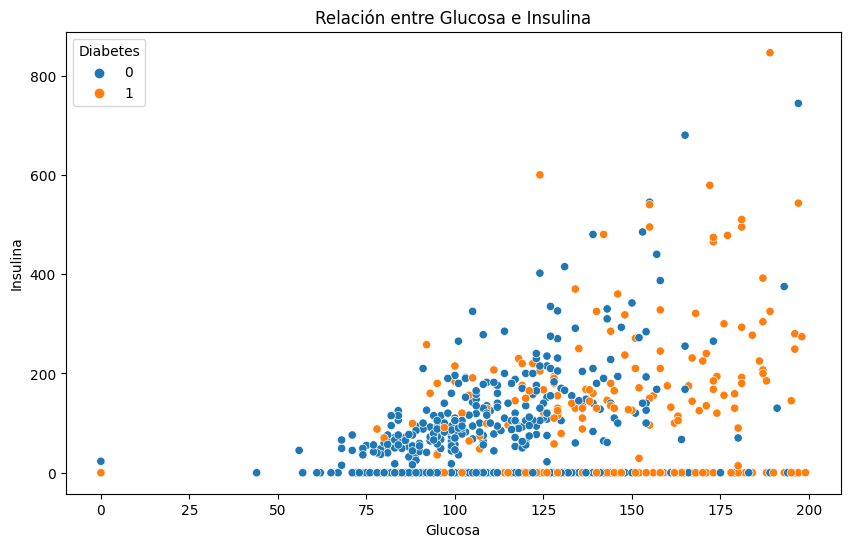

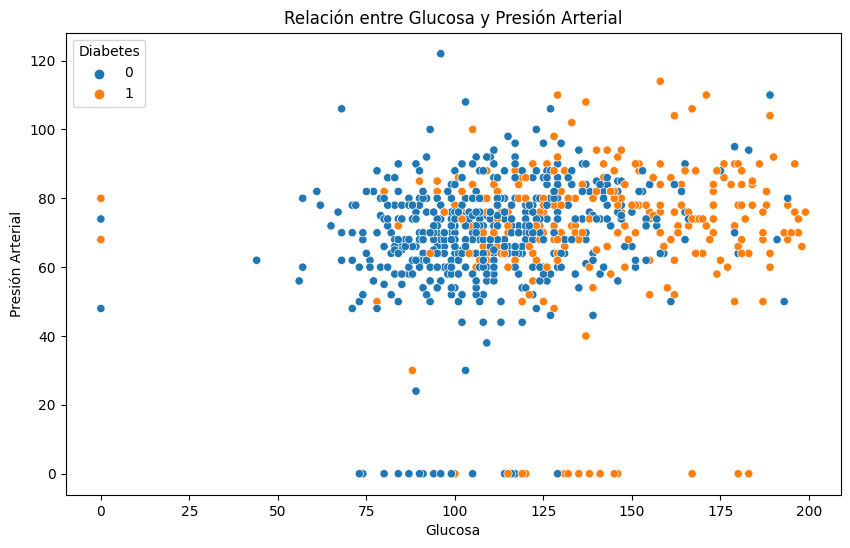

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df)
plt.title('Relación entre Glucosa e Insulina')
plt.xlabel('Glucosa')
plt.ylabel('Insulina')
plt.legend(title='Diabetes')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='BloodPressure', hue='Outcome', data=df)
plt.title('Relación entre Glucosa y Presión Arterial')
plt.xlabel('Glucosa')
plt.ylabel('Presión Arterial')
plt.legend(title='Diabetes')
plt.show()


### B)

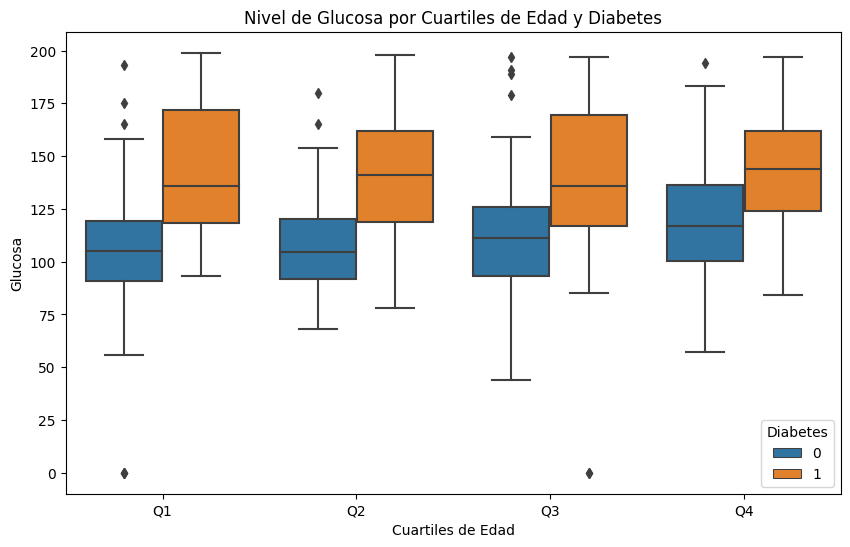

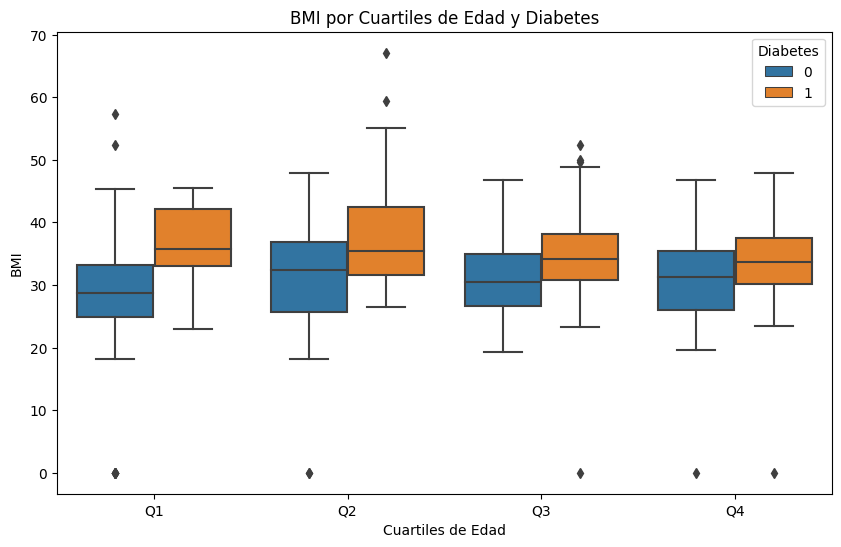

In [35]:
df['cuartiles'] = pd.qcut(df['Age'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cuartiles', y='Glucose', hue='Outcome')
plt.title('Nivel de Glucosa por Cuartiles de Edad y Diabetes')
plt.xlabel('Cuartiles de Edad')
plt.ylabel('Glucosa')
plt.legend(title='Diabetes')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cuartiles', y='BMI', hue='Outcome')
plt.title('BMI por Cuartiles de Edad y Diabetes')
plt.xlabel('Cuartiles de Edad')
plt.ylabel('BMI')
plt.legend(title='Diabetes')
plt.show()


### C)

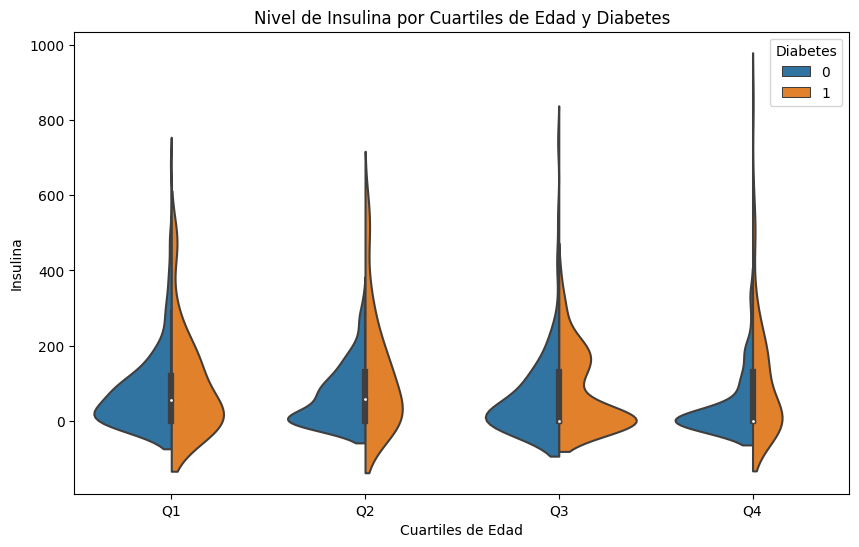

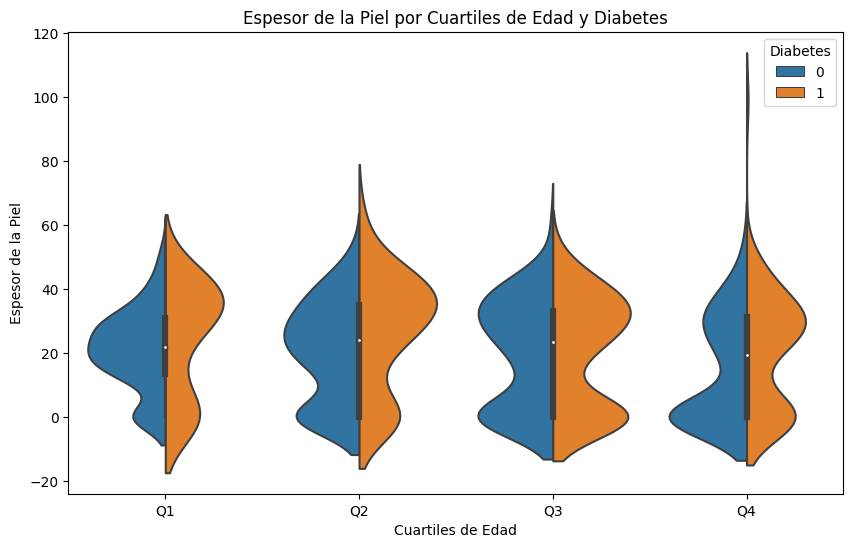

In [37]:
df['cuartiles'] = pd.qcut(df['Age'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='cuartiles', y='Insulin', hue='Outcome', split=True)
plt.title('Nivel de Insulina por Cuartiles de Edad y Diabetes')
plt.xlabel('Cuartiles de Edad')
plt.ylabel('Insulina')
plt.legend(title='Diabetes')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='cuartiles', y='SkinThickness', hue='Outcome', split=True)
plt.title('Espesor de la Piel por Cuartiles de Edad y Diabetes')
plt.xlabel('Cuartiles de Edad')
plt.ylabel('Espesor de la Piel')
plt.legend(title='Diabetes')
plt.show()


### D)

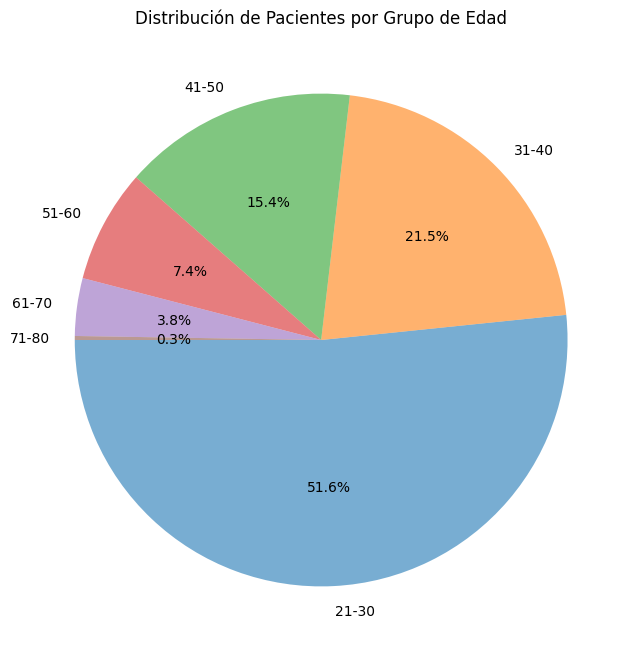

In [70]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['grupos'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
grupos_count = df['grupos'].value_counts().sort_index()

plt.figure(figsize=(8,8))
ax = grupos_count.plot.pie(autopct='%1.1f%%', startangle=180)

for wedge in ax.patches:
    wedge.set_alpha(0.6)
plt.title('Distribución de Pacientes por Grupo de Edad')
plt.ylabel('')  
plt.show()


### E)

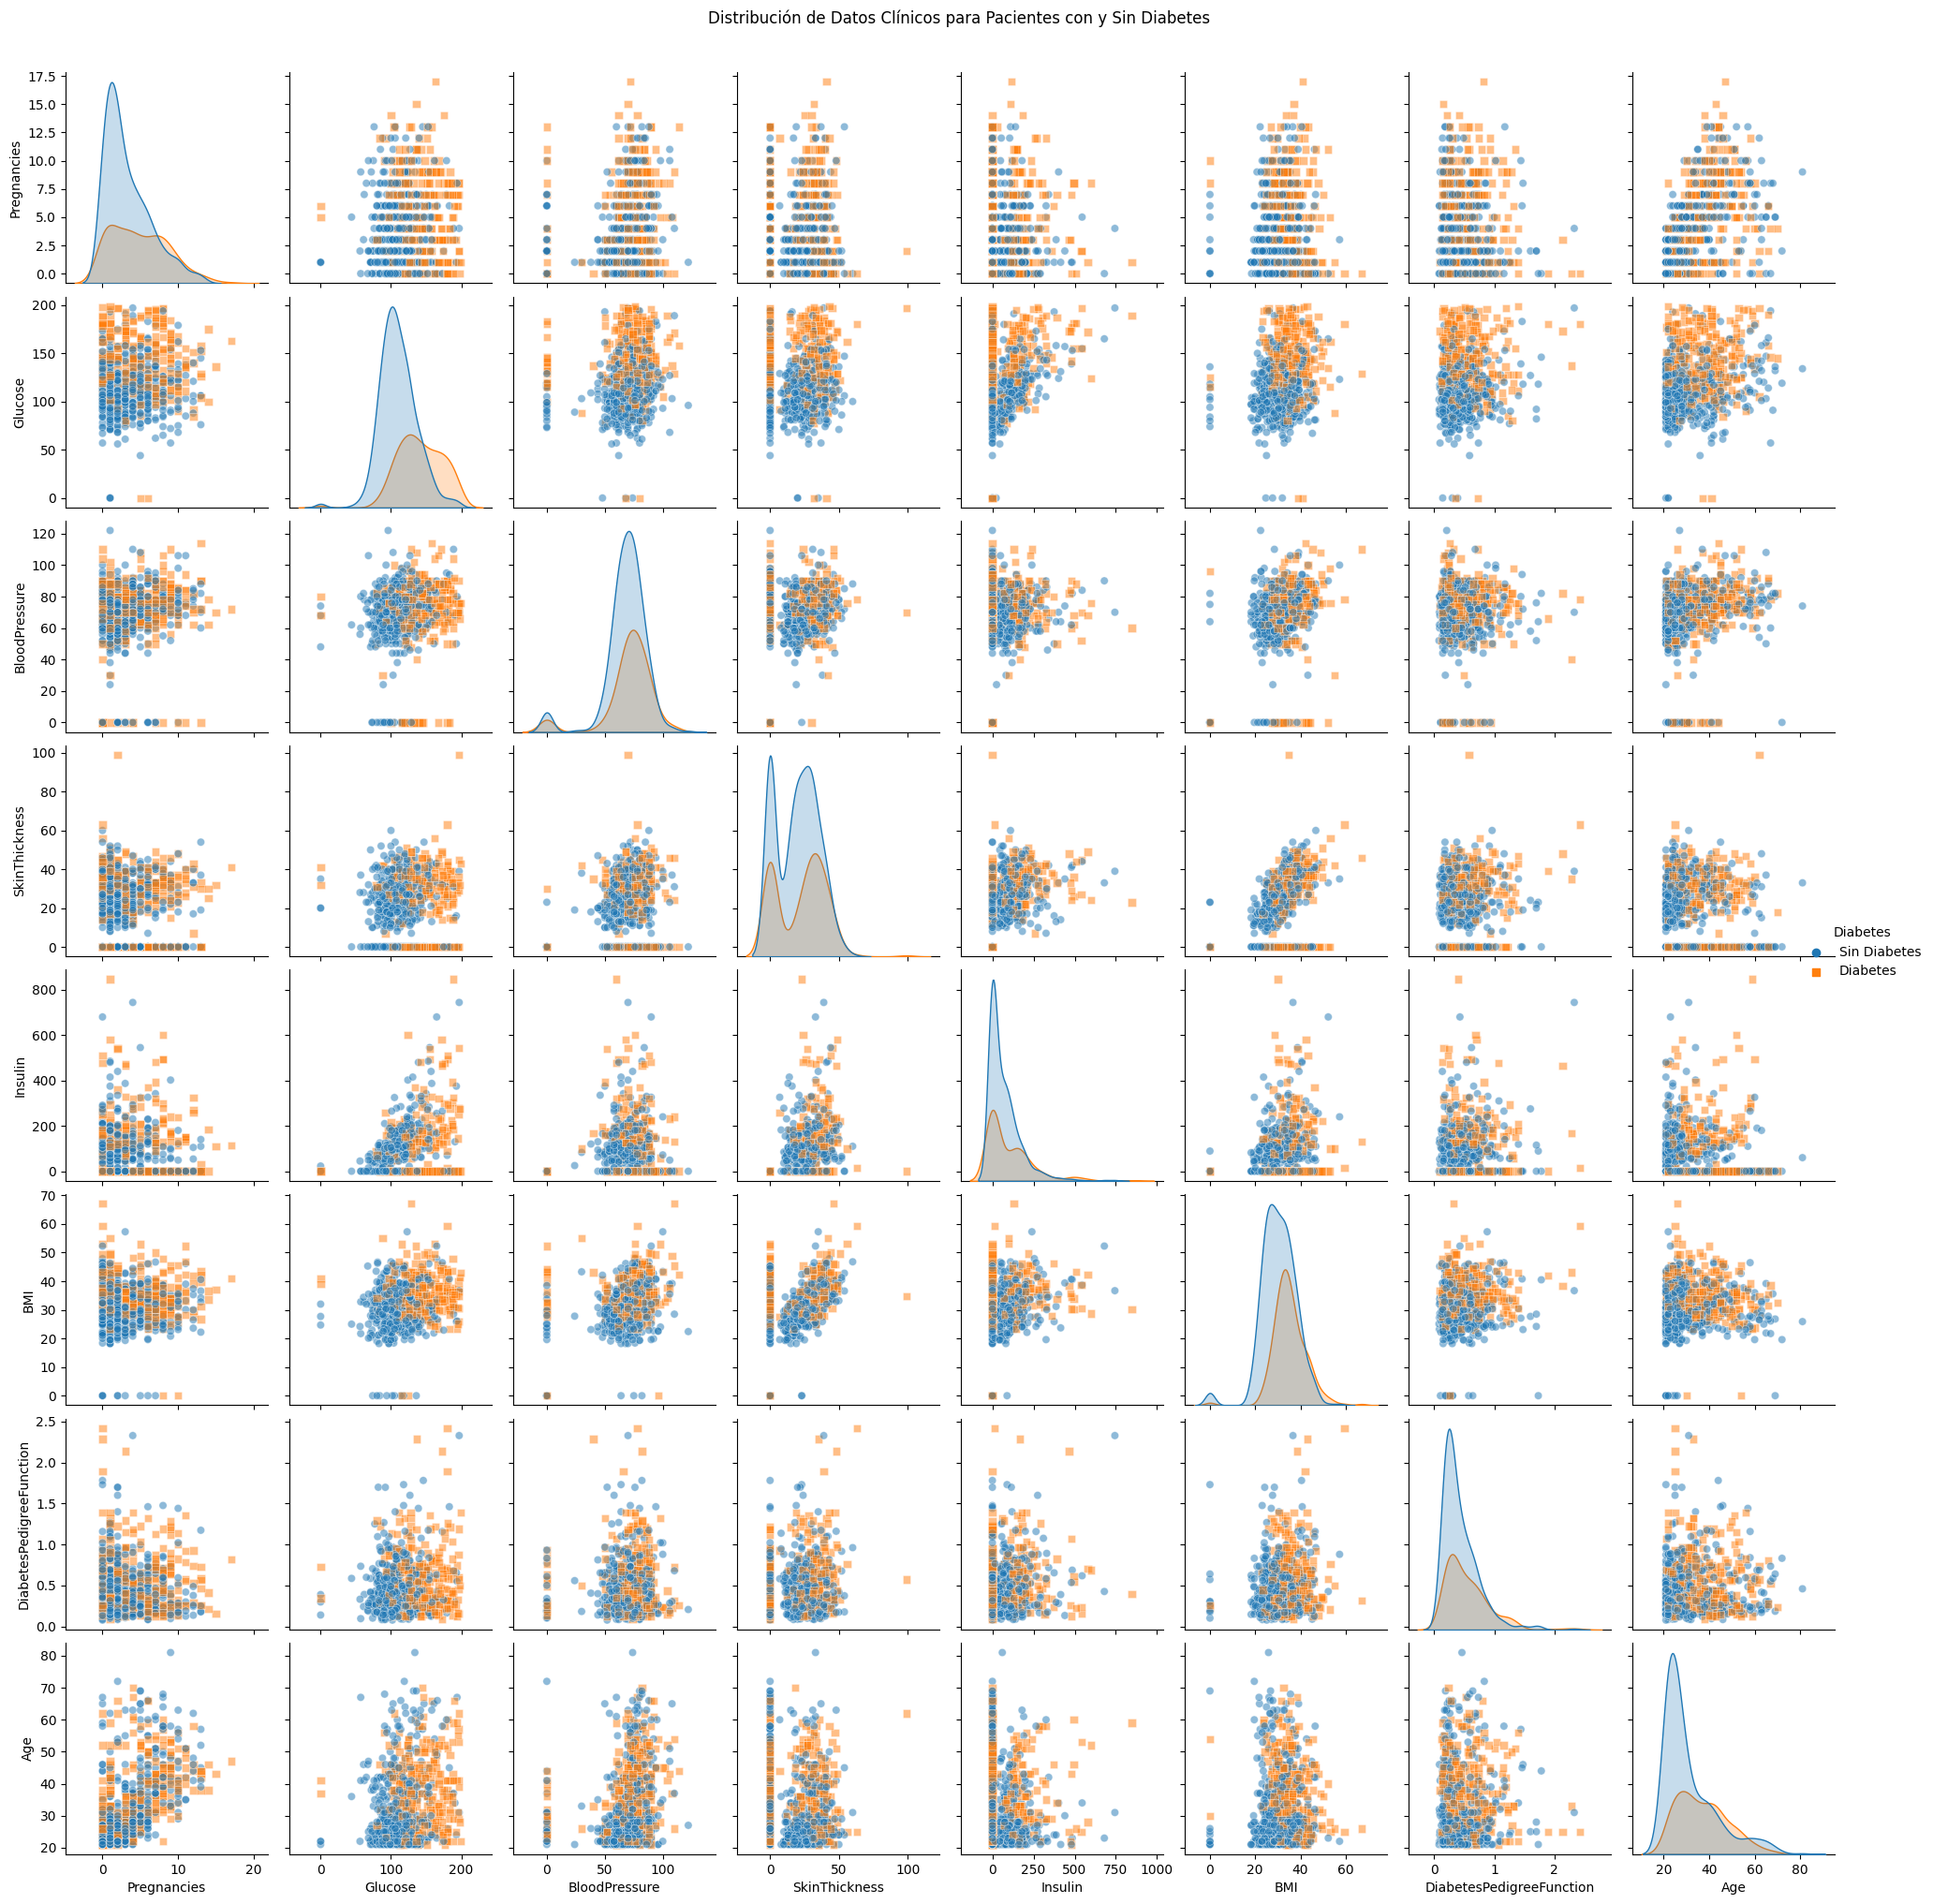

In [73]:
plot = sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=["o", "s"], plot_kws={'alpha':0.5})
plot._legend.set_title('Diabetes')
labels = ['Sin Diabetes', 'Diabetes']

for t, l in zip(plot._legend.texts, labels):
    t.set_text(l)

plt.suptitle('Distribución de Datos Clínicos para Pacientes con y Sin Diabetes', y=1.02)
plt.show()


